In [6]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Add, Activation, BatchNormalization, AveragePooling2D
from keras.models import Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import ipywidgets as widgets
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:

# Define the image size and labels
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [8]:

# Define the image size and labels
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load and preprocess the data (assuming your data loading part remains the same)
X_train = []
Y_train = []
for i in labels:
    folderPath = os.path.join("C:/Users/Sourin Dey/Desktop/Brain-Tumor-Detection/Dataset/Training/", i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('C:/Users/Sourin Dey/Desktop/Brain-Tumor-Detection/Dataset/Testing/', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

y_train_new = [labels.index(i) for i in y_train]
y_train = tf.keras.utils.to_categorical(y_train_new)

y_test_new = [labels.index(i) for i in y_test]
y_test = tf.keras.utils.to_categorical(y_test_new)


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:

# Define a basic residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    # First convolutional layer
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Adjust shortcut if the input and output dimensions don't match
    if stride != 1 or x.shape[-1] != shortcut.shape[-1]:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add the shortcut to the main path
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
# Build the Custom CNN model
input_tensor = Input(shape=(image_size, image_size, 3))

# Initial convolutional layer
x = Conv2D(64, 7, strides=2, padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(3, strides=2, padding='same')(x)

# Residual blocks
x = residual_block(x, 64)
x = residual_block(x, 64)

x = residual_block(x, 128, stride=2)
x = residual_block(x, 128)

x = residual_block(x, 256, stride=2)
x = residual_block(x, 256)

x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 75, 75,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 75, 75,    │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 38, 38,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 38, 38,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 38, 38,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 38, 38,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 38, 38,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 38, 38,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 38, 38,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 38, 38,    │          0 │ activation_2[0][… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 38, 38,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 38, 38,    │     36,928 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 38, 38,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 38, 38,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 38, 38,    │     36,928 │ activation_4[0][

 Total params: 2,923,140 (11.15 MB)

 Trainable params: 2,918,660 (11.13 MB)

 Non-trainable params: 4,480 (17.50 KB)

In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.5987 - loss: 1.0217 - val_accuracy: 0.3544 - val_loss: 6.0921
Epoch 2/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7760 - loss: 0.5755 - val_accuracy: 0.7658 - val_loss: 0.6743
Epoch 3/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.8470 - loss: 0.4132 - val_accuracy: 0.7484 - val_loss: 0.7586
Epoch 4/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8848 - loss: 0.3117 - val_accuracy: 0.7025 - val_loss: 0.7784
Epoch 5/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.9050 - loss: 0.2633 - val_accuracy: 0.6677 - val_loss: 0.9349
Epoch 6/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.9239 - loss: 0.2027 - val_accuracy: 0.8861 - val_loss: 0.2909
Epoch 7/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9413 - loss: 0.1657 - val_accuracy: 0.8956 - val_loss: 0.2928
Epoch 8/35
178/178 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9471 - loss: 0.1398 - val_accu

In [ ]:
model.save("bear.h5")

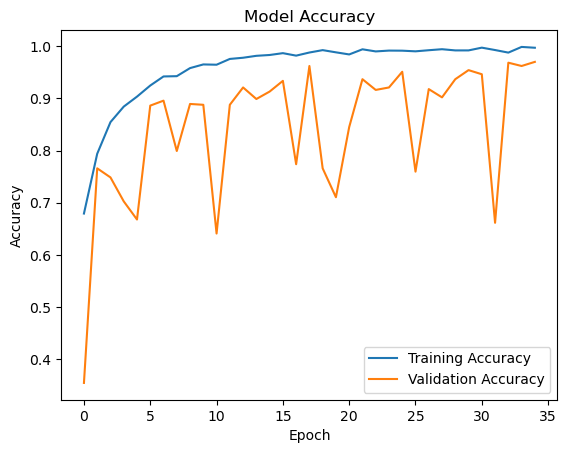

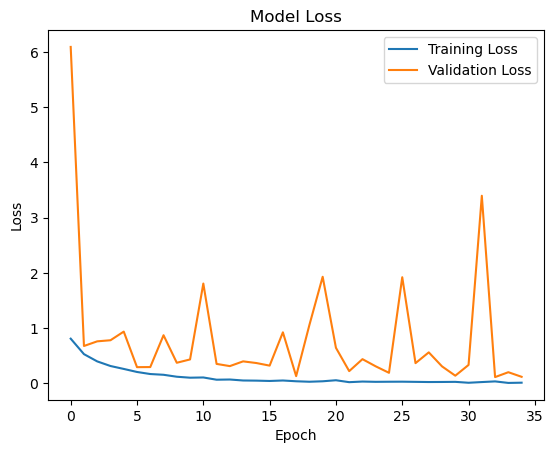

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [ ]:

pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_test_original = np.argmax(y_test, axis=1)

print(classification_report(y_test_original, pred, target_names=labels))

22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 243ms/step
              precision    recall  f1-score   support

      glioma       0.96      0.97      0.96       170
  meningioma       0.95      0.95      0.95       175
     notumor       0.98      0.97      0.98       202
   pituitary       0.97      0.97      0.97       156

    accuracy                           0.97       703
   macro avg       0.97      0.97      0.97       703
weighted avg       0.97      0.97      0.97       703



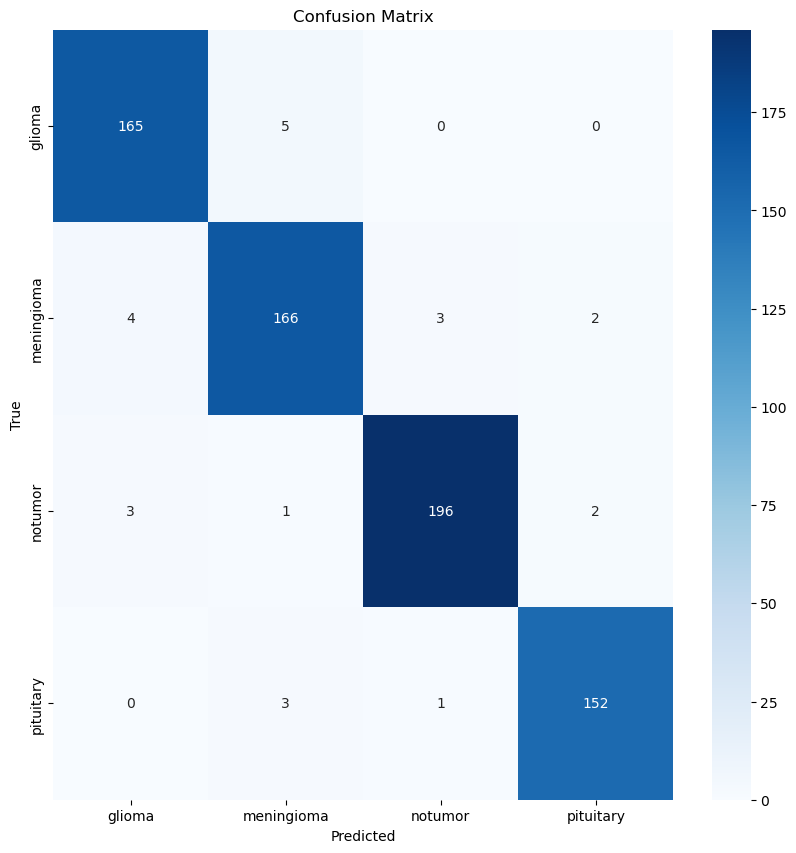

In [ ]:
mat = confusion_matrix(y_test_original, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(mat,fmt='d', annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("C:/Users/Sourin Dey/Desktop/Brain-Tumor-Detection/Dataset/confusion_matrix/confusion_matrix_resnet.png")
plt.show()

In [ ]:
def get_name(n):
    return labels[n]

n = np.random.randint(0, len(X_test))
img = X_test[n]
plt.imshow(img)
plt.title(f"Actual: {get_name(y_test_original[n])}")
plt.show()

NameError: name 'X_test' is not defined

In [ ]:



predicted_value = model.predict(X_test[n].reshape(1, image_size, image_size, 3))
predicted_class = np.argmax(predicted_value)
print('Predicted Label - ', get_name(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step
Predicted Label -  meningioma
